## From GPT

In [ ]:
pip install PyPortfolioOpt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 7.9 MB/s eta 0:00:00


In [ ]:
from google.colab import files

In [ ]:
df1 = files.upload()

Saving stock_prices.csv to stock_prices.csv


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("stock_prices.csv", parse_dates=True, index_col="date")

In [ ]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import sample_cov

mu = mean_historical_return(df)
S = sample_cov(df)


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
raw_weights = ef.max_sharpe()
weights = ef.clean_weights()
ef.portfolio_performance(verbose=True)


Expected annual return: 24.5%
Annual volatility: 23.3%
Sharpe Ratio: 1.05


(np.float64(0.24516230838121827),
 np.float64(0.23346549569259947),
 np.float64(1.050100819626125))

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=10000)
allocation, leftover = da.greedy_portfolio()
print("Allocation:", allocation)
print("Funds remaining:", leftover)


Allocation: {'MA': 7, 'WMT': 21, 'GOOG': 10, 'META': 2, 'AMZN': 4, 'SBUX': 3, 'BBY': 1, 'AAPL': 1}
Funds remaining: 7.109916687011719


In [ ]:
from pypfopt.black_litterman import BlackLittermanModel

viewdict ={'MA': 7, 'WMT': 21, 'GOOG': 10, 'META': 2, 'AMZN': 4, 'SBUX': 3, 'BBY': 1, 'AAPL': 1}
bl = BlackLittermanModel(S, pi="equal", absolute_views=viewdict, omega="default")
rets = bl.bl_returns()
ef = EfficientFrontier(rets, S)
ef.max_sharpe()


OrderedDict([('AAPL', 0.0),
             ('AMD', 0.0),
             ('AMZN', 0.0),
             ('BABA', 0.0),
             ('BAC', 0.0),
             ('BBY', 0.0),
             ('GE', 0.0),
             ('GM', 0.0),
             ('GOOG', 0.1644510157437226),
             ('JPM', 0.0),
             ('MA', 0.0262047506285036),
             ('META', 0.0),
             ('PFE', 0.0),
             ('RRC', 0.0),
             ('SBUX', 0.0),
             ('T', 0.0),
             ('UAA', 0.0),
             ('WMT', 0.8052090104925202),
             ('XOM', 0.0041352231352536)])

## RiskReturnModels

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypfopt
from pypfopt import risk_models, expected_returns, plotting

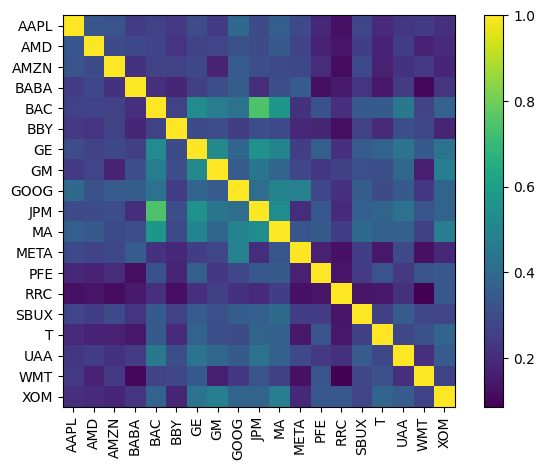

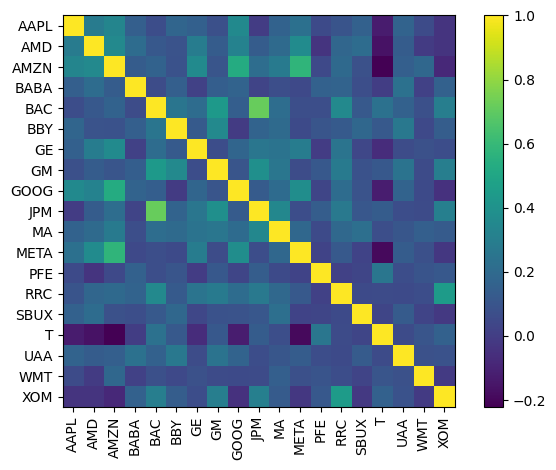

In [ ]:
df = pd.read_csv("stock_prices.csv", parse_dates=True, index_col="date")
past_df, future_df = df.iloc[:-250], df.iloc[-250:]
future_cov = risk_models.sample_cov(future_df)

sample_cov = risk_models.sample_cov(past_df)
plotting.plot_covariance(sample_cov, plot_correlation=True)
plotting.plot_covariance(future_cov, plot_correlation=True)
plt.show()

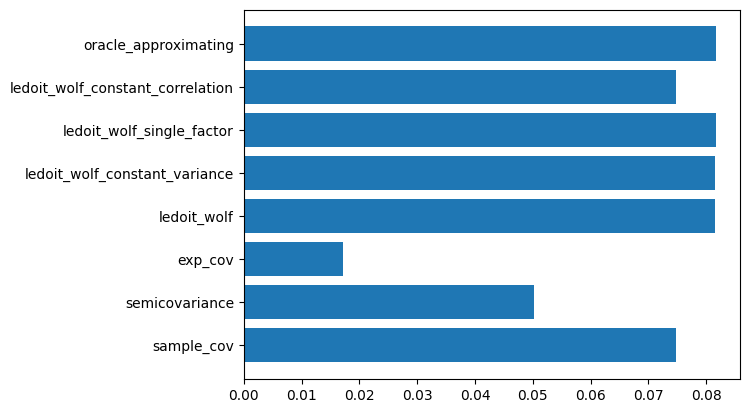

In [ ]:
future_variance = np.diag(future_cov)
mean_abs_errors = []

risk_methods = [
    "sample_cov",
    "semicovariance",
    "exp_cov",
    "ledoit_wolf",
    "ledoit_wolf_constant_variance",
    "ledoit_wolf_single_factor",
    "ledoit_wolf_constant_correlation",
    "oracle_approximating",
]

for method in risk_methods:
    S = risk_models.risk_matrix(df, method=method)
    variance = np.diag(S)
    mean_abs_errors.append(np.sum(np.abs(variance - future_variance)) / len(variance))

xrange = range(len(mean_abs_errors))
plt.barh(xrange, mean_abs_errors)
plt.yticks(xrange, risk_methods)
plt.show()

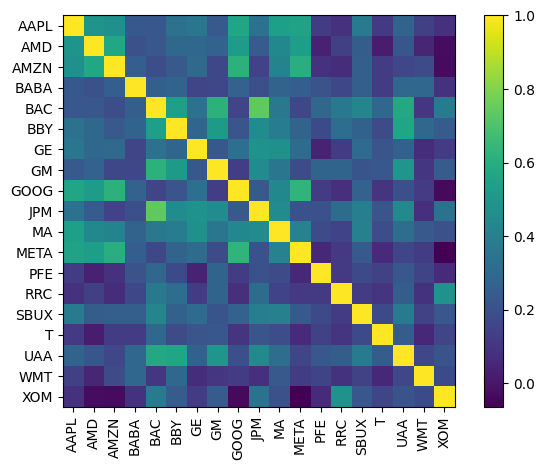

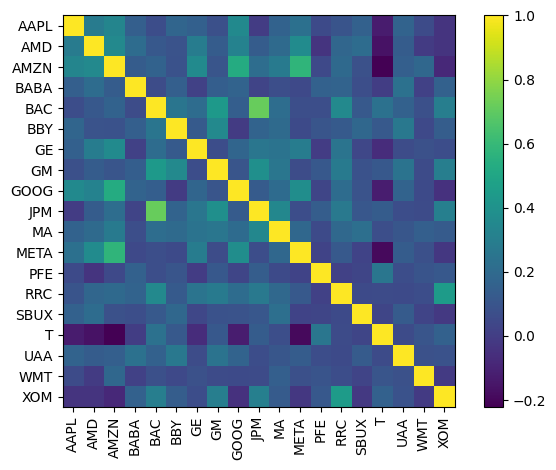

In [ ]:
exp_cov = risk_models.exp_cov(past_df)
plotting.plot_covariance(exp_cov, plot_correlation=True)
plotting.plot_covariance(future_cov, plot_correlation=True)
plt.show()

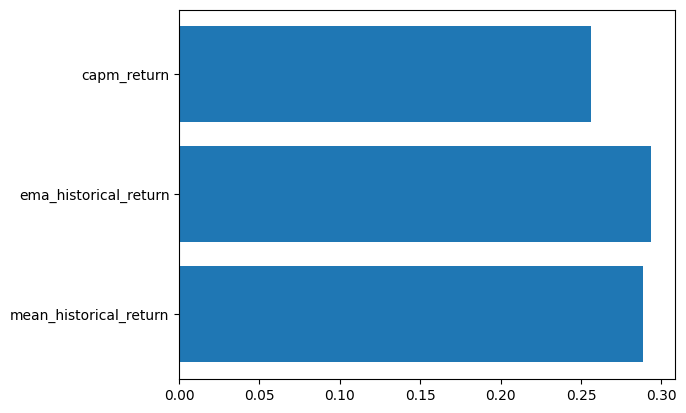

In [ ]:
future_rets = expected_returns.mean_historical_return(future_df)
mean_abs_errors = []
return_methods = [
    "mean_historical_return",
    "ema_historical_return",
    "capm_return",
    ]

for method in return_methods:
    mu = expected_returns.return_model(past_df, method=method)
    mean_abs_errors.append(np.sum(np.abs(mu - future_rets)) / len(mu))

xrange = range(len(mean_abs_errors))
plt.barh(xrange, mean_abs_errors)
plt.yticks(xrange, return_methods)
plt.show()

In [ ]:
print(mean_abs_errors)

[np.float64(0.28823644686482447), np.float64(0.29381479725985093), np.float64(0.25592985267259755)]


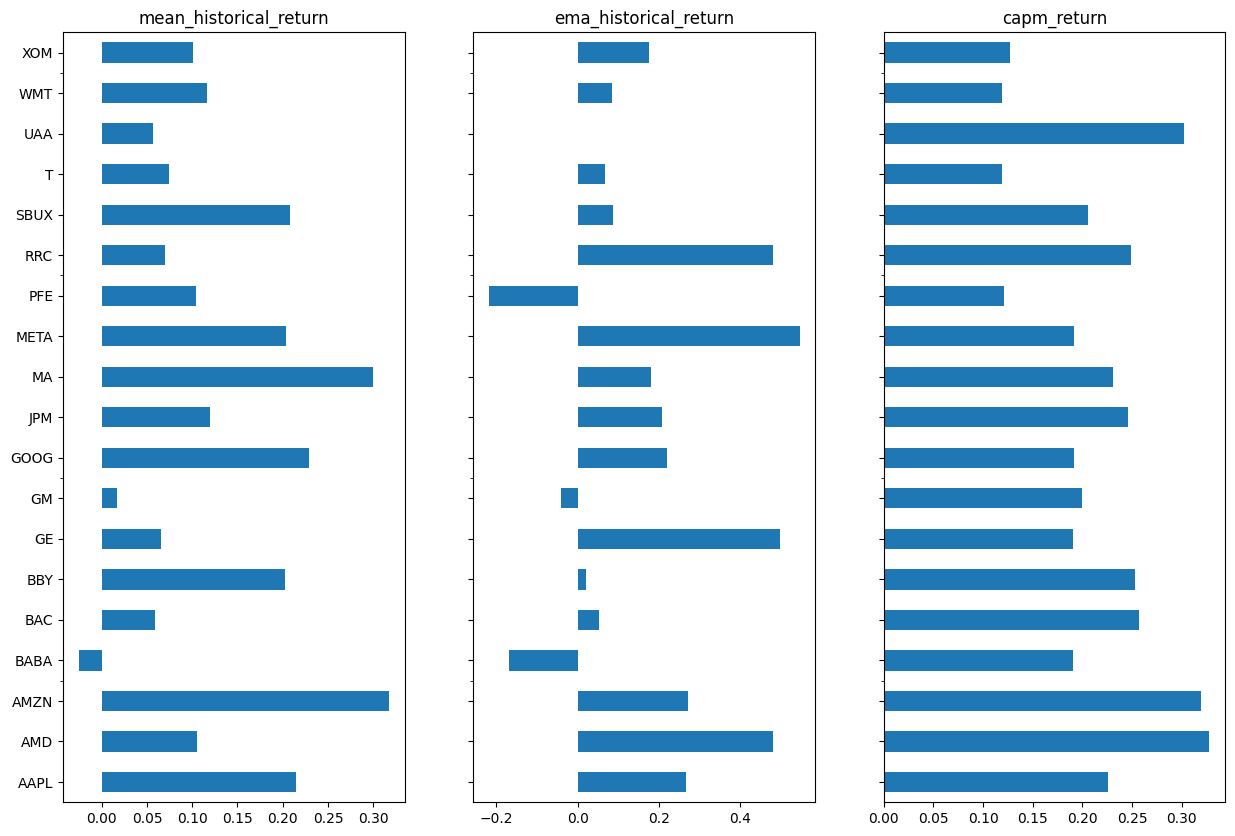

In [ ]:
fig, axs = plt.subplots( 1, len(return_methods),sharey=True, figsize=(15,10))

for i, method in enumerate(return_methods):
    mu = expected_returns.return_model(past_df, method=method)
    axs[i].set_title(method)
    mu.plot.barh(ax=axs[i])

## Mean-Variance-Optimisation

In [ ]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
tickers = ["MSFT", "AMZN", "KO", "MA", "COST",
           "LUV", "XOM", "PFE", "JPM", "UNH",
           "ACN", "DIS", "GILD", "F", "TSLA"]

In [ ]:
ohlc = yf.download(tickers,auto_adjust=False , period="max").loc["1990":]

[*********************100%***********************]  15 of 15 completed


In [ ]:
ohlc.columns

MultiIndex([('Adj Close',  'ACN'),
            ('Adj Close', 'AMZN'),
            ('Adj Close', 'COST'),
            ('Adj Close',  'DIS'),
            ('Adj Close',    'F'),
            ('Adj Close', 'GILD'),
            ('Adj Close',  'JPM'),
            ('Adj Close',   'KO'),
            ('Adj Close',  'LUV'),
            ('Adj Close',   'MA'),
            ('Adj Close', 'MSFT'),
            ('Adj Close',  'PFE'),
            ('Adj Close', 'TSLA'),
            ('Adj Close',  'UNH'),
            ('Adj Close',  'XOM'),
            (    'Close',  'ACN'),
            (    'Close', 'AMZN'),
            (    'Close', 'COST'),
            (    'Close',  'DIS'),
            (    'Close',    'F'),
            (    'Close', 'GILD'),
            (    'Close',  'JPM'),
            (    'Close',   'KO'),
            (    'Close',  'LUV'),
            (    'Close',   'MA'),
            (    'Close', 'MSFT'),
            (    'Close',  'PFE'),
            (    'Close', 'TSLA'),
            (    'Cl

In [ ]:
prices = ohlc["Adj Close"].dropna(how="all")
prices.tail()

Ticker,ACN,AMZN,COST,DIS,F,GILD,JPM,KO,LUV,MA,MSFT,PFE,TSLA,UNH,XOM
Date,,,,,,,,,,,,,,,
2025-06-09,316.619995,216.979996,1006.179993,115.660004,10.34,113.000000,266.739990,71.769997,33.570000,584.330017,472.750000,23.969999,308.579987,303.190002,104.970001
2025-06-10,320.920013,217.610001,1007.270020,118.730003,10.60,110.089996,268.600006,72.349998,34.360001,589.539978,470.920013,24.299999,326.089996,303.790009,107.220001
2025-06-11,319.220001,213.199997,996.780029,119.519997,10.66,109.300003,268.149994,72.070000,33.490002,590.739990,472.619995,24.480000,326.429993,310.559998,109.309998
2025-06-12,318.130005,213.240005,1002.710022,118.610001,10.53,112.050003,268.239990,72.239998,32.580002,589.280029,478.869995,24.840000,319.109985,318.500000,109.730003
2025-06-13,311.709991,212.100006,990.210022,117.940002,10.43,109.980003,264.950012,71.019997,31.730000,562.030029,474.959991,24.540001,325.309998,313.529999,112.120003


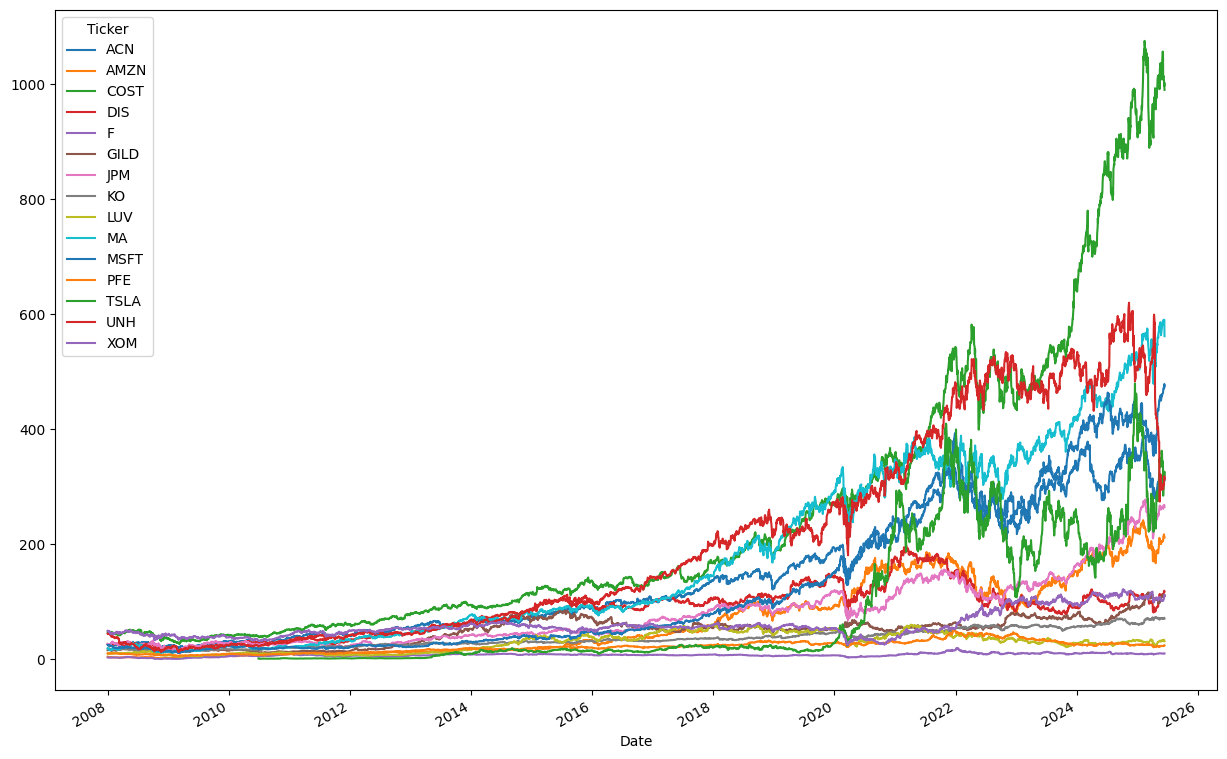

In [ ]:
prices[prices.index >= "2008-01-01"].plot(figsize=(15,10));

In [ ]:
from pypfopt import risk_models
from pypfopt import plotting

sample_cov = risk_models.sample_cov(prices, frequency=252)
sample_cov

Ticker,ACN,AMZN,COST,DIS,F,GILD,JPM,KO,LUV,MA,MSFT,PFE,TSLA,UNH,XOM
Ticker,,,,,,,,,,,,,,,
ACN,0.087968,0.045539,0.027434,0.039740,0.043040,0.027615,0.045517,0.019189,0.036386,0.043491,0.040517,0.024681,0.043060,0.028166,0.028191
AMZN,0.045539,0.310477,0.046324,0.054618,0.051682,0.053587,0.062670,0.018457,0.047038,0.053373,0.071417,0.029313,0.069803,0.031651,0.025116
COST,0.027434,0.046324,0.093387,0.028245,0.030257,0.025544,0.036098,0.018043,0.029293,0.030757,0.034128,0.022592,0.031614,0.023862,0.017504
DIS,0.039740,0.054618,0.028245,0.089726,0.043319,0.030450,0.050035,0.021849,0.041599,0.047698,0.037364,0.024574,0.045779,0.028554,0.028138
F,0.043040,0.051682,0.030257,0.043319,0.151086,0.028791,0.059569,0.022640,0.050147,0.057844,0.038775,0.024321,0.060619,0.028732,0.030462
GILD,0.027615,0.053587,0.025544,0.030450,0.028791,0.219318,0.039916,0.016340,0.029783,0.029621,0.032986,0.031550,0.028785,0.032252,0.020201
JPM,0.045517,0.062670,0.036098,0.050035,0.059569,0.039916,0.134585,0.025313,0.053144,0.063300,0.046087,0.032392,0.043248,0.038044,0.034561
KO,0.019189,0.018457,0.018043,0.021849,0.022640,0.016340,0.025313,0.047621,0.019355,0.024167,0.021004,0.021456,0.015430,0.021968,0.019794
LUV,0.036386,0.047038,0.029293,0.041599,0.050147,0.029783,0.053144,0.019355,0.137037,0.045926,0.033767,0.024231,0.047197,0.030080,0.023081


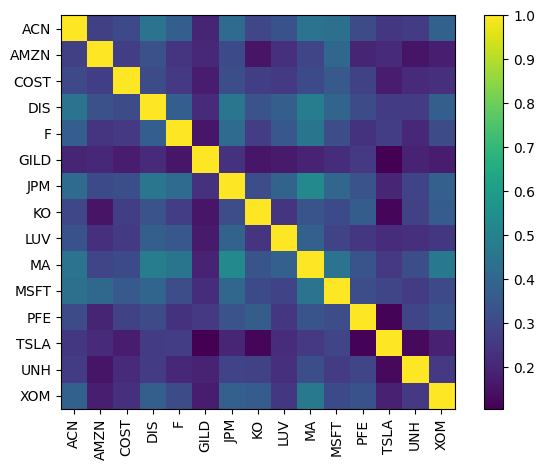

In [ ]:
plotting.plot_covariance(sample_cov, plot_correlation=True);

In [ ]:
from pypfopt import expected_returns

mu = expected_returns.capm_return(prices)
mu

,mkt
Ticker,
ACN,0.202084
AMZN,0.353744
COST,0.176199
DIS,0.206602
F,0.240793
GILD,0.241238
JPM,0.263569
KO,0.118459
LUV,0.223293


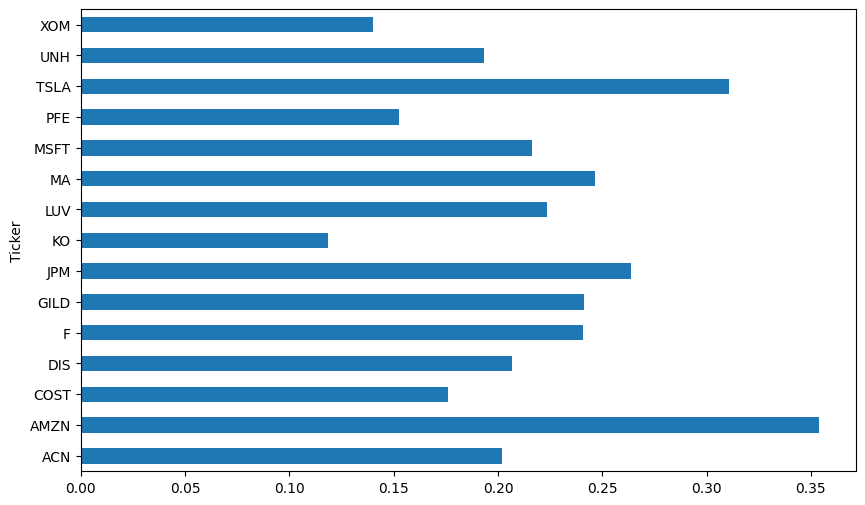

In [ ]:
mu.plot.barh(figsize=(10,6));

In [ ]:
from pypfopt import EfficientFrontier

In [ ]:
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

# You don't have to provide expected returns in this case
ef = EfficientFrontier(None, S, weight_bounds=(None, None))
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('ACN', 0.15999),
             ('AMZN', 0.00163),
             ('COST', 0.08456),
             ('DIS', 0.00283),
             ('F', -0.01721),
             ('GILD', 0.03155),
             ('JPM', -0.06531),
             ('KO', 0.26683),
             ('LUV', 0.02261),
             ('MA', 0.17128),
             ('MSFT', -0.00459),
             ('PFE', 0.10379),
             ('TSLA', 0.08707),
             ('UNH', 0.02799),
             ('XOM', 0.12698)])

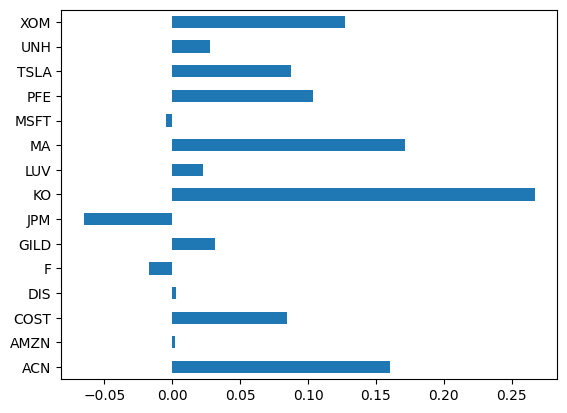

In [ ]:
pd.Series(weights).plot.barh();

In [ ]:
ef.portfolio_performance(verbose=True);

Annual volatility: 15.3%


In [ ]:
from pypfopt import DiscreteAllocation

latest_prices = prices.iloc[-1]  # prices as of the day you are allocating
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=20000, short_ratio=0.3)
alloc, leftover = da.lp_portfolio()
print(f"Discrete allocation performed with ${leftover:.2f} leftover")
alloc

Discrete allocation performed with $28.20 leftover


{'ACN': 9,
 'COST': 2,
 'GILD': 5,
 'KO': 69,
 'LUV': 13,
 'MA': 5,
 'PFE': 78,
 'TSLA': 5,
 'UNH': 2,
 'XOM': 21,
 'F': -97,
 'JPM': -17,
 'MSFT': -1}

In [ ]:
sector_mapper = {
    "MSFT": "Tech",
    "AMZN": "Consumer Discretionary",
    "KO": "Consumer Staples",
    "MA": "Financial Services",
    "COST": "Consumer Staples",
    "LUV": "Aerospace",
    "XOM": "Energy",
    "PFE": "Healthcare",
    "JPM": "Financial Services",
    "UNH": "Healthcare",
    "ACN": "Misc",
    "DIS": "Media",
    "GILD": "Healthcare",
    "F": "Auto",
    "TSLA": "Auto"
}

sector_lower = {
    "Consumer Staples": 0.1, # at least 10% to staples
    "Tech": 0.05 # at least 5% to tech
    # For all other sectors, it will be assumed there is no lower bound
}

sector_upper = {
    "Tech": 0.2,
    "Aerospace":0.1,
    "Energy": 0.1,
    "Auto":0.15
}

In [ ]:
mu = expected_returns.capm_return(prices)
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

ef = EfficientFrontier(mu, S)  # weight_bounds automatically set to (0, 1)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)

amzn_index = ef.tickers.index("AMZN")
ef.add_constraint(lambda w: w[amzn_index] == 0.10)

tsla_index = ef.tickers.index("TSLA")
ef.add_constraint(lambda w: w[tsla_index] <= 0.05)

ef.add_constraint(lambda w: w[10] >= 0.05)

ef.max_sharpe()
weights = ef.clean_weights()

In [ ]:
weights

OrderedDict([('ACN', 0.1525),
             ('AMZN', 0.1),
             ('COST', 0.04196),
             ('DIS', 0.0),
             ('F', 0.01597),
             ('GILD', 0.06219),
             ('JPM', 0.00831),
             ('KO', 0.05804),
             ('LUV', 0.03659),
             ('MA', 0.34497),
             ('MSFT', 0.05),
             ('PFE', 0.03799),
             ('TSLA', 0.05),
             ('UNH', 0.04147),
             ('XOM', 0.0)])

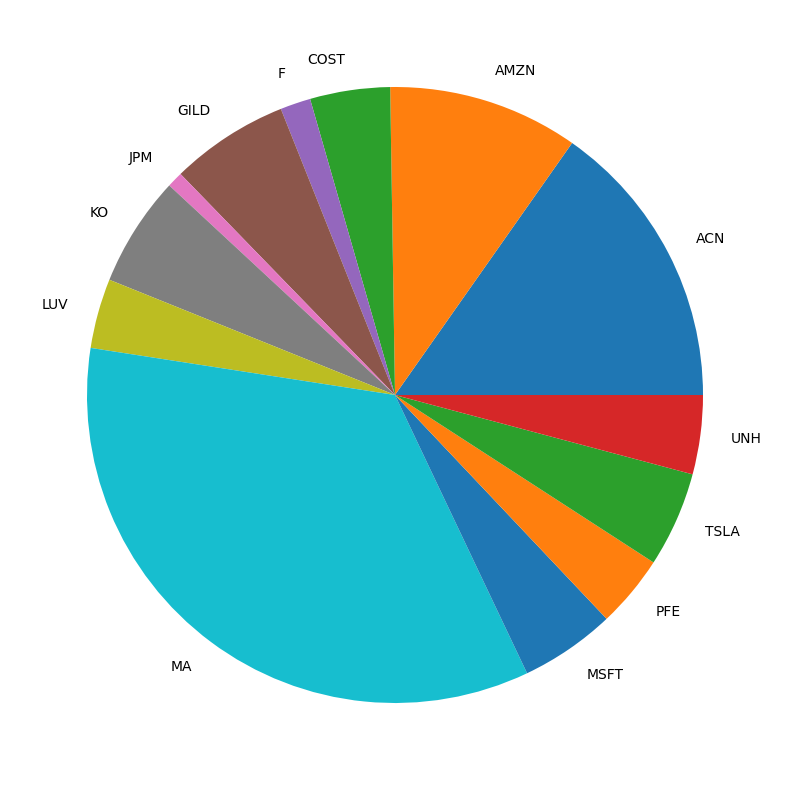

In [ ]:
pd.Series(weights).plot.pie(figsize=(10,10));

In [ ]:
# O(N^2) loop not a good idea in a coding interview :)
for sector in set(sector_mapper.values()):
    total_weight = 0
    for t,w in weights.items():
        if sector_mapper[t] == sector:
            total_weight += w
    print(f"{sector}: {total_weight:.3f}")

Media: 0.000
Healthcare: 0.142
Auto: 0.066
Tech: 0.050
Consumer Staples: 0.100
Energy: 0.000
Misc: 0.152
Aerospace: 0.037
Financial Services: 0.353
Consumer Discretionary: 0.100


In [ ]:
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.efficient_risk(target_volatility=0.20)
weights = ef.clean_weights()
weights

OrderedDict([('ACN', 0.02865),
             ('AMZN', 0.14835),
             ('COST', 0.1),
             ('DIS', 0.0),
             ('F', 0.0),
             ('GILD', 0.06689),
             ('JPM', 0.05944),
             ('KO', 0.0),
             ('LUV', 0.01491),
             ('MA', 0.38176),
             ('MSFT', 0.05),
             ('PFE', 0.0),
             ('TSLA', 0.15),
             ('UNH', 0.0),
             ('XOM', 0.0)])

In [ ]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} tickers have zero weight")

6/15 tickers have zero weight


In [ ]:
ef.portfolio_performance(verbose=True);

Expected annual return: 26.3%
Annual volatility: 20.0%
Sharpe Ratio: 1.31


In [ ]:
from pypfopt import objective_functions

# You must always create a new efficient frontier object
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma=0.1)  # gamma is the tuning parameter
ef.efficient_risk(0.2)
weights = ef.clean_weights()
weights

OrderedDict([('ACN', 0.07092),
             ('AMZN', 0.16542),
             ('COST', 0.08387),
             ('DIS', 0.00584),
             ('F', 0.0),
             ('GILD', 0.07602),
             ('JPM', 0.09145),
             ('KO', 0.01613),
             ('LUV', 0.04522),
             ('MA', 0.21893),
             ('MSFT', 0.05),
             ('PFE', 0.0),
             ('TSLA', 0.15),
             ('UNH', 0.02619),
             ('XOM', 0.0)])

In [ ]:
num_small = len([k for k in weights if weights[k] <= 1e-4])
print(f"{num_small}/{len(ef.tickers)} tickers have zero weight")

3/15 tickers have zero weight


In [ ]:
ef = EfficientFrontier(mu, S)
ef.add_sector_constraints(sector_mapper, sector_lower, sector_upper)
ef.add_objective(objective_functions.L2_reg, gamma=1)  # gamma is the tuning parameter
ef.efficient_risk(0.2)
weights = ef.clean_weights()
weights

OrderedDict([('ACN', 0.05836),
             ('AMZN', 0.13419),
             ('COST', 0.06443),
             ('DIS', 0.06062),
             ('F', 0.05748),
             ('GILD', 0.07794),
             ('JPM', 0.0891),
             ('KO', 0.03557),
             ('LUV', 0.06897),
             ('MA', 0.0806),
             ('MSFT', 0.06536),
             ('PFE', 0.03353),
             ('TSLA', 0.09252),
             ('UNH', 0.05386),
             ('XOM', 0.02747)])

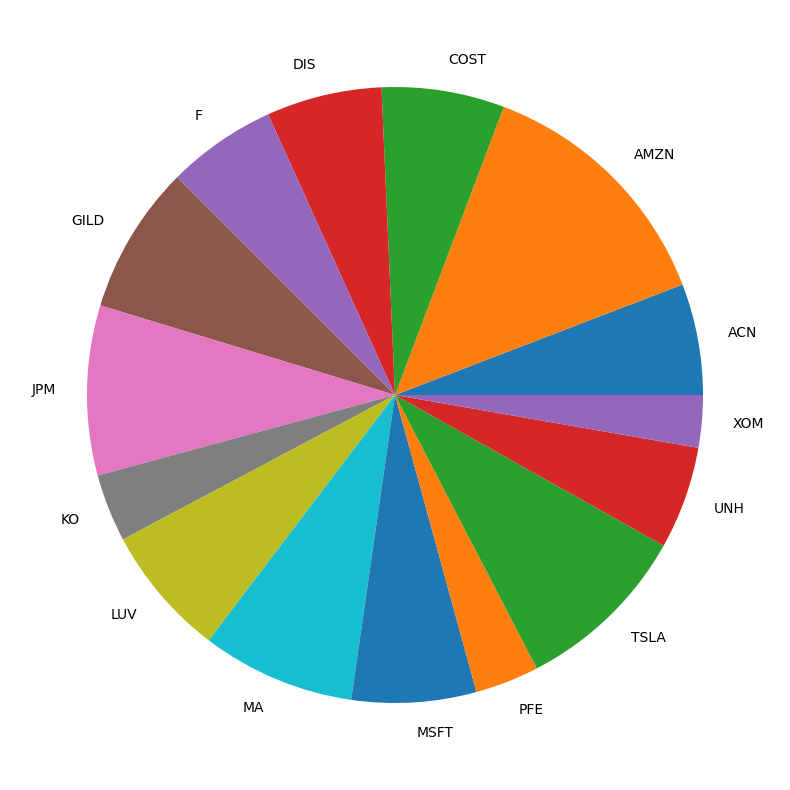

In [ ]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [ ]:
ef.portfolio_performance(verbose=True);

Expected annual return: 24.1%
Annual volatility: 19.5%
Sharpe Ratio: 1.23


In [ ]:
# Must have no weight bounds to allow shorts
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))
ef.add_objective(objective_functions.L2_reg)
ef.efficient_return(target_return=0.07, market_neutral=True)
weights = ef.clean_weights()
weights

OrderedDict([('ACN', -0.02203),
             ('AMZN', 0.16415),
             ('COST', -0.0563),
             ('DIS', -0.01571),
             ('F', 0.03),
             ('GILD', 0.03001),
             ('JPM', 0.06285),
             ('KO', -0.13592),
             ('LUV', 0.00716),
             ('MA', 0.04115),
             ('MSFT', -0.00446),
             ('PFE', -0.08701),
             ('TSLA', 0.12067),
             ('UNH', -0.029),
             ('XOM', -0.10556)])

In [ ]:
ef.portfolio_performance(verbose=True);

Expected annual return: 7.0%
Annual volatility: 11.0%
Sharpe Ratio: 0.63


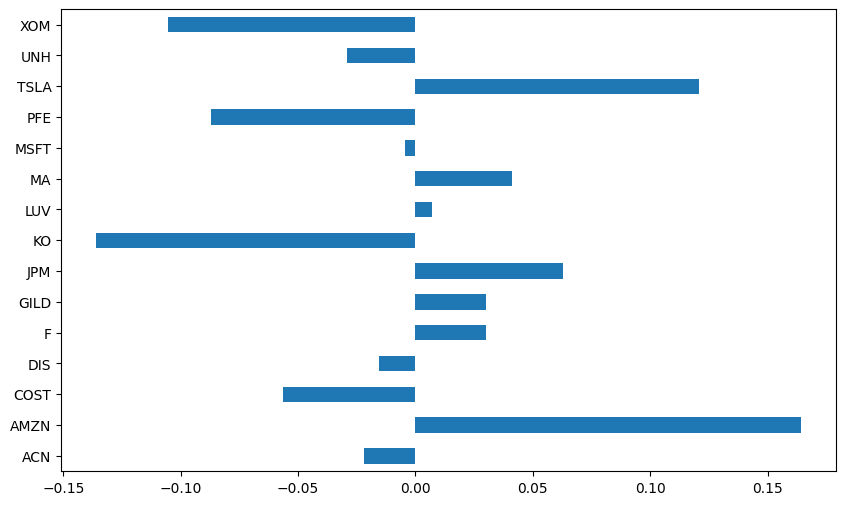

In [ ]:
pd.Series(weights).plot.barh(figsize=(10,6));

In [ ]:
print(f"Net weight: {sum(weights.values()):.2f}")

Net weight: -0.00


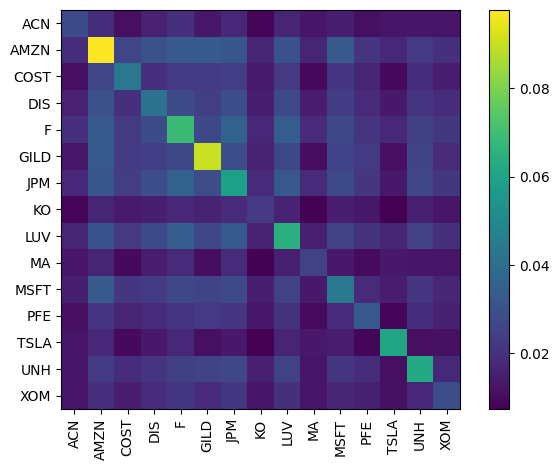

In [ ]:
semicov = risk_models.semicovariance(prices, benchmark=0)
plotting.plot_covariance(semicov);

In [ ]:
ef = EfficientFrontier(mu, semicov)
ef.efficient_return(0.2)
weights = ef.clean_weights()
weights

OrderedDict([('ACN', 0.1738),
             ('AMZN', 0.0),
             ('COST', 0.05918),
             ('DIS', 0.0),
             ('F', 0.0),
             ('GILD', 0.00568),
             ('JPM', 0.0),
             ('KO', 0.26009),
             ('LUV', 0.0),
             ('MA', 0.31286),
             ('MSFT', 0.0),
             ('PFE', 0.07442),
             ('TSLA', 0.10434),
             ('UNH', 0.0),
             ('XOM', 0.00964)])

In [ ]:
ef.portfolio_performance(verbose=True);

Expected annual return: 20.0%
Annual volatility: 11.9%
Sharpe Ratio: 1.68


In [ ]:
returns = expected_returns.returns_from_prices(prices)
returns = returns.dropna()

In [ ]:
from pypfopt import EfficientSemivariance

es = EfficientSemivariance(mu, returns)
es.efficient_return(0.2)
es.portfolio_performance(verbose=True);

Expected annual return: 20.0%
Annual semi-deviation: 10.7%
Sortino Ratio: 1.87


In [ ]:
es.weights = ef.weights
es.portfolio_performance(verbose=True);

Expected annual return: 20.0%
Annual semi-deviation: 13.0%
Sortino Ratio: 1.54


In [ ]:
returns = expected_returns.returns_from_prices(prices).dropna()
returns.head()

Ticker,ACN,AMZN,COST,DIS,F,GILD,JPM,KO,LUV,MA,MSFT,PFE,TSLA,UNH,XOM
Date,,,,,,,,,,,,,,,
2010-06-30,0.000000,0.005985,-0.014381,-0.024768,0.020243,-0.019731,-0.012142,-0.004173,0.000000,-0.017045,-0.012870,-0.001400,-0.002511,-0.008033,-0.003840
2010-07-01,-0.009573,0.015559,0.001277,-0.000318,0.048611,-0.004084,-0.013129,-0.001796,-0.010801,0.016652,0.006519,-0.002104,-0.078473,-0.019367,-0.008060
2010-07-02,-0.008882,-0.016402,-0.012204,-0.003493,-0.027436,0.021383,-0.006929,0.000400,-0.021838,0.000345,0.004750,-0.006325,-0.125683,0.016158,-0.000707
2010-07-06,0.012388,0.008430,-0.004241,0.010835,-0.011673,-0.002868,0.013955,0.007593,-0.011163,-0.013513,0.023635,0.010608,-0.160937,0.020848,0.015733
2010-07-07,0.022130,0.030620,0.005371,0.044767,0.042323,0.004889,0.050096,0.020622,0.062089,0.037695,0.020152,0.023093,-0.019243,0.010730,0.016881


In [ ]:
ef = EfficientFrontier(mu, S)
ef.max_sharpe()
weight_arr = ef.weights
ef.portfolio_performance(verbose=True);

Expected annual return: 24.3%
Annual volatility: 17.8%
Sharpe Ratio: 1.37


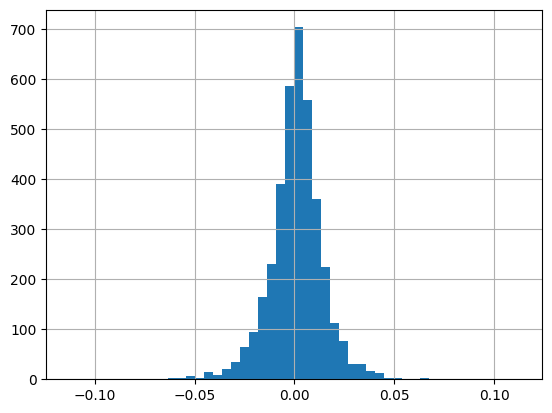

In [ ]:
# Compute CVaR
portfolio_rets = (returns * weight_arr).sum(axis=1)
portfolio_rets.hist(bins=50);

In [ ]:
# VaR
var = portfolio_rets.quantile(0.05)
cvar = portfolio_rets[portfolio_rets <= var].mean()
print("VaR: {:.2f}%".format(100*var))
print("CVaR: {:.2f}%".format(100*cvar))

VaR: -2.14%
CVaR: -3.16%


In [ ]:
from pypfopt import EfficientCVaR

ec = EfficientCVaR(mu, returns)
ec.min_cvar()
ec.portfolio_performance(verbose=True);

Expected annual return: 15.2%
Conditional Value at Risk: 2.09%


In [ ]:
from pypfopt import EfficientCVaR

ec = EfficientCVaR(mu, returns)
ec.efficient_risk(target_cvar=0.025)
ec.portfolio_performance(verbose=True);

Expected annual return: 23.2%
Conditional Value at Risk: 2.50%


In [ ]:
from pypfopt import CLA, plotting

cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 24.3%
Annual volatility: 17.8%
Sharpe Ratio: 1.37


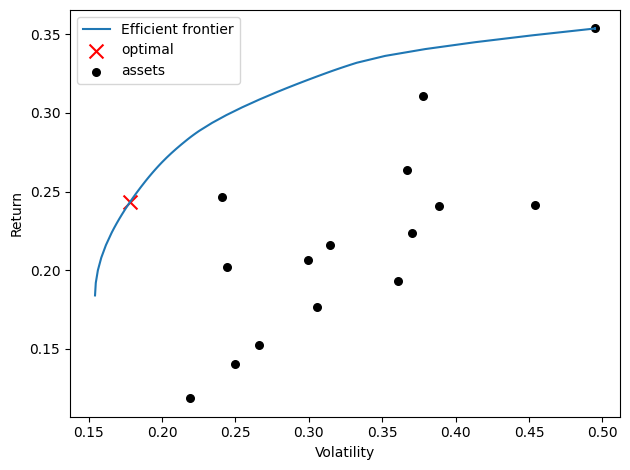

In [ ]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

In [ ]:
ax = plotting.plot_efficient_frontier(cla, showfig=False, interactive=True)
ax.show()

In [ ]:

import cvxpy as cp

mu = expected_returns.capm_return(prices)
S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()

ef = EfficientFrontier(mu, S,)
big_tech_indices = [t in {"MSFT", "AMZN", "TSLA"} for t in tickers]
ef.add_constraint(lambda w: cp.sum(w[big_tech_indices]) <= 0.3)

In [ ]:
mu

,mkt
Ticker,
ACN,0.202084
AMZN,0.353744
COST,0.176199
DIS,0.206602
F,0.240793
GILD,0.241238
JPM,0.263569
KO,0.118459
LUV,0.223293


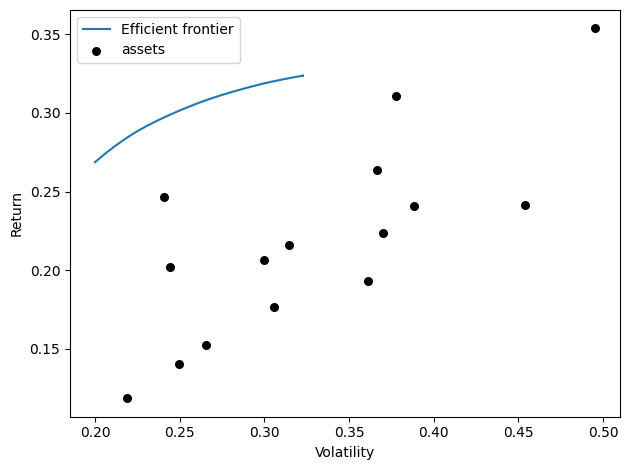

In [ ]:
ax = plotting.plot_efficient_frontier(ef, ef_param="risk",
                                      ef_param_range=np.linspace(0.2, 0.5, 50),
                                      showfig=False);

In [ ]:
n_samples = 10000
w = np.random.dirichlet(np.ones(len(mu)), n_samples)
rets = w.dot(mu)
stds = np.sqrt((w.T * (S @ w.T)).sum(axis=0))
sharpes = rets / stds

print("Sample portfolio returns:", rets)
print("Sample portfolio volatilities:", stds)

Sample portfolio returns: [0.22095459 0.25490087 0.20765989 ... 0.2205016  0.22263442 0.2069537 ]
Sample portfolio volatilities: 0       0.191137
1       0.229358
2       0.167989
3       0.206866
4       0.196173
          ...   
9995    0.180833
9996    0.183943
9997    0.208896
9998    0.178168
9999    0.174301
Length: 10000, dtype: float64


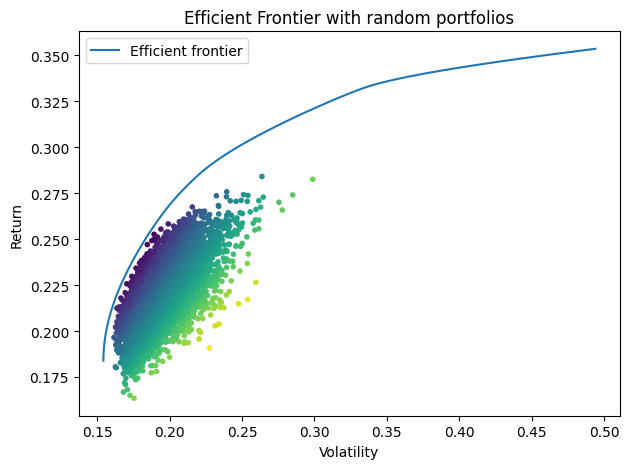

In [ ]:
# Plot efficient frontier with Monte Carlo sim
ef = EfficientFrontier(mu, S)

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef, ax=ax, show_assets=False)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu, S)
ef2.max_sharpe()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()

# Plot random portfolios
ax.scatter(stds, rets, marker=".", c=sharpes, cmap="viridis_r")

# Format
ax.set_title("Efficient Frontier with random portfolios")
ax.legend()
plt.tight_layout()
plt.show()

## Advanced-Mean-Variance-Optimisation

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
tickers = ["BLK", "BAC", "AAPL", "TM", "WMT",
           "JD", "INTU", "MA", "UL", "CVS",
           "DIS", "AMD", "NVDA", "PBI", "TGT"]

In [ ]:
ohlc = yf.download(tickers,auto_adjust=False, period="max")

[*********************100%***********************]  15 of 15 completed


In [ ]:
prices = ohlc["Adj Close"]
prices.tail()

Ticker,AAPL,AMD,BAC,BLK,CVS,DIS,INTU,JD,MA,NVDA,PBI,TGT,TM,UL,WMT
Date,,,,,,,,,,,,,,,
2025-06-09,201.449997,121.730003,44.869999,988.840027,63.860001,115.660004,764.380005,33.939999,584.330017,142.620102,10.53,97.349998,183.940002,62.750000,97.449997
2025-06-10,202.669998,123.239998,45.090000,991.900024,64.260002,118.730003,762.099976,33.790001,589.539978,143.950012,10.49,100.769997,185.250000,63.130001,97.320000
2025-06-11,198.779999,121.139999,44.730000,993.299988,65.720001,119.519997,764.750000,33.730000,590.739990,142.830002,10.45,98.110001,182.610001,62.939999,95.800003
2025-06-12,199.199997,118.500000,44.619999,988.250000,66.349998,118.610001,766.210022,33.610001,589.280029,145.000000,10.49,99.290001,181.990005,63.650002,94.830002
2025-06-13,196.449997,116.160004,44.090000,971.820007,67.459999,117.940002,753.979980,32.759998,562.030029,141.970001,10.28,95.370003,178.750000,62.669998,94.440002


In [ ]:
from pypfopt import risk_models, expected_returns
from pypfopt import plotting

mu = expected_returns.capm_return(prices)
S = risk_models.semicovariance(prices)

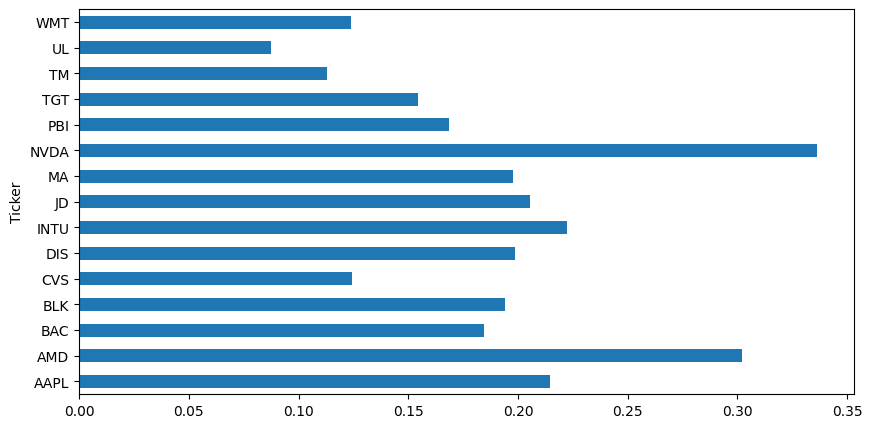

In [ ]:
mu.plot.barh(figsize=(10,5));

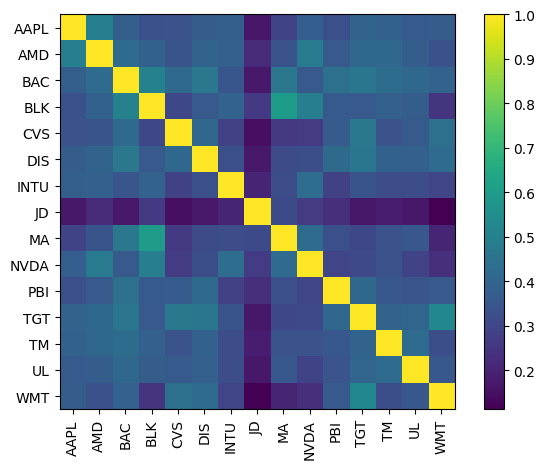

In [ ]:
plotting.plot_covariance(S, plot_correlation=True);

In [ ]:
# Pretend that you started with a default-weight allocation
initial_weights = np.array([1/len(tickers)] * len(tickers))

In [ ]:
from pypfopt import EfficientFrontier, objective_functions

ef = EfficientFrontier(mu, S)

# 1% broker commission
ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=0.01)
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.04848),
             ('AMD', 0.0),
             ('BAC', 0.0411),
             ('BLK', 0.06667),
             ('CVS', 0.06667),
             ('DIS', 0.06667),
             ('INTU', 0.06667),
             ('JD', 0.18786),
             ('MA', 0.06667),
             ('NVDA', 0.05589),
             ('PBI', 0.06667),
             ('TGT', 0.06667),
             ('TM', 0.06667),
             ('UL', 0.06667),
             ('WMT', 0.06667)])

In [ ]:
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=0.001)
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.0),
             ('AMD', 0.0),
             ('BAC', 0.0),
             ('BLK', 0.06667),
             ('CVS', 0.05417),
             ('DIS', 0.0),
             ('INTU', 0.00878),
             ('JD', 0.28602),
             ('MA', 0.27595),
             ('NVDA', 0.0),
             ('PBI', 0.0),
             ('TGT', 0.0),
             ('TM', 0.06667),
             ('UL', 0.15578),
             ('WMT', 0.08596)])

In [ ]:
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=0.001)
ef.add_objective(objective_functions.L2_reg)
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.06229),
             ('AMD', 0.0535),
             ('BAC', 0.06263),
             ('BLK', 0.07037),
             ('CVS', 0.06724),
             ('DIS', 0.06529),
             ('INTU', 0.06667),
             ('JD', 0.07577),
             ('MA', 0.07338),
             ('NVDA', 0.06303),
             ('PBI', 0.06438),
             ('TGT', 0.06587),
             ('TM', 0.06938),
             ('UL', 0.07147),
             ('WMT', 0.06873)])

In [ ]:
ef = EfficientFrontier(mu, S)
ef.add_objective(objective_functions.transaction_cost, w_prev=initial_weights, k=0.001)
ef.add_objective(objective_functions.L2_reg, gamma=0.05)  # default is 1
ef.min_volatility()
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.02272),
             ('AMD', 0.0),
             ('BAC', 0.01214),
             ('BLK', 0.0986),
             ('CVS', 0.06667),
             ('DIS', 0.0444),
             ('INTU', 0.05953),
             ('JD', 0.16462),
             ('MA', 0.14127),
             ('NVDA', 0.0219),
             ('PBI', 0.03256),
             ('TGT', 0.04909),
             ('TM', 0.08845),
             ('UL', 0.11496),
             ('WMT', 0.0831)])

In [ ]:
ef.portfolio_performance(verbose=True);

Expected annual return: 16.9%
Annual volatility: 10.1%
Sharpe Ratio: 1.67


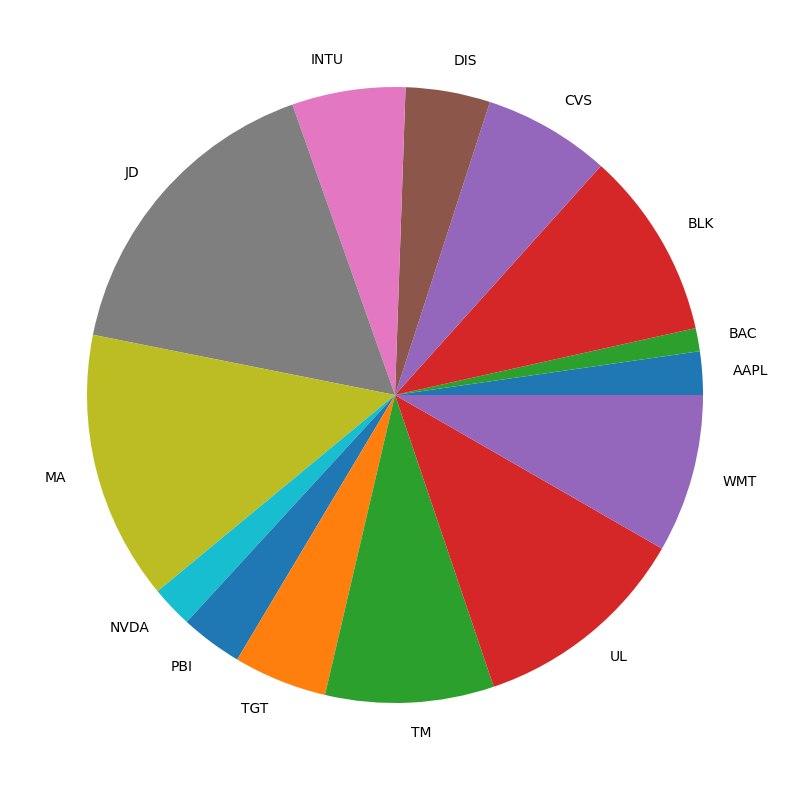

In [ ]:
pd.Series(weights).plot.pie(figsize=(10,10));

In [ ]:
import cvxpy as cp

# Note: functions are minimised. If you want to maximise an objective, stick a minus sign in it.
def logarithmic_barrier_objective(w, cov_matrix, k=0.1):
    log_sum = cp.sum(cp.log(w))
    var = cp.quad_form(w, cov_matrix)
    return var - k * log_sum

In [ ]:
ef = EfficientFrontier(mu, S, weight_bounds=(0.01, 0.2))
ef.convex_objective(logarithmic_barrier_objective, cov_matrix=S, k=0.001)
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.0394),
             ('AMD', 0.0256),
             ('BAC', 0.03859),
             ('BLK', 0.07863),
             ('CVS', 0.05935),
             ('DIS', 0.04693),
             ('INTU', 0.05201),
             ('JD', 0.16884),
             ('MA', 0.12255),
             ('NVDA', 0.03953),
             ('PBI', 0.04323),
             ('TGT', 0.04882),
             ('TM', 0.07264),
             ('UL', 0.09372),
             ('WMT', 0.07018)])

In [ ]:
ef.portfolio_performance(verbose=True);

Expected annual return: 17.9%
Annual volatility: 10.8%
Sharpe Ratio: 1.66


In [ ]:
ef = EfficientFrontier(mu, S, weight_bounds=(0.01, 0.2))
jd_index = ef.tickers.index("JD")  # get the index of JD
ef.add_constraint(lambda w: w[jd_index] <= 0.15)
ef.convex_objective(logarithmic_barrier_objective, cov_matrix=S, k=0.001)
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.03974),
             ('AMD', 0.0257),
             ('BAC', 0.03881),
             ('BLK', 0.08079),
             ('CVS', 0.06034),
             ('DIS', 0.04747),
             ('INTU', 0.05284),
             ('JD', 0.15),
             ('MA', 0.12863),
             ('NVDA', 0.04002),
             ('PBI', 0.04381),
             ('TGT', 0.04942),
             ('TM', 0.07431),
             ('UL', 0.09655),
             ('WMT', 0.07156)])

In [ ]:
def deviation_risk_parity(w, cov_matrix):
    diff = w * np.dot(cov_matrix, w) - (w * np.dot(cov_matrix, w)).reshape(-1, 1)
    return (diff ** 2).sum().sum()

In [ ]:
ef = EfficientFrontier(mu, S, weight_bounds=(0.01, 0.12))
ef.nonconvex_objective(deviation_risk_parity, ef.cov_matrix)
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.04258),
             ('AMD', 0.03339),
             ('BAC', 0.04245),
             ('BLK', 0.08707),
             ('CVS', 0.07091),
             ('DIS', 0.05539),
             ('INTU', 0.06396),
             ('JD', 0.10069),
             ('MA', 0.09643),
             ('NVDA', 0.0465),
             ('PBI', 0.05074),
             ('TGT', 0.0585),
             ('TM', 0.08246),
             ('UL', 0.09072),
             ('WMT', 0.07821)])

In [ ]:
ef = EfficientFrontier(mu, S, weight_bounds=(0.01, 0.12))

ef.nonconvex_objective(
    deviation_risk_parity,
    objective_args=S,
    weights_sum_to_one=True,
    constraints=[
        {"type": "eq", "fun": lambda w: w[jd_index] - 0.10},
    ],
)

weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.05695),
             ('AMD', 0.03043),
             ('BAC', 0.05895),
             ('BLK', 0.07317),
             ('CVS', 0.06958),
             ('DIS', 0.06441),
             ('INTU', 0.06695),
             ('JD', 0.1),
             ('MA', 0.07493),
             ('NVDA', 0.05896),
             ('PBI', 0.06258),
             ('TGT', 0.06561),
             ('TM', 0.07209),
             ('UL', 0.07399),
             ('WMT', 0.0714)])

In [ ]:
# Another example of deviation risk parity
def deviation_risk_parity(w, cov_matrix):
    n = cov_matrix.shape[0]
    rp = (w * (cov_matrix @ w)) / cp.quad_form(w, cov_matrix)
    return cp.sum_squares(rp - 1 / n).value

ef = EfficientFrontier(mu, S)
ef.nonconvex_objective(deviation_risk_parity, ef.cov_matrix)
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.04718),
             ('AMD', 0.03357),
             ('BAC', 0.04696),
             ('BLK', 0.07848),
             ('CVS', 0.06383),
             ('DIS', 0.05409),
             ('INTU', 0.05842),
             ('JD', 0.12818),
             ('MA', 0.10286),
             ('NVDA', 0.04797),
             ('PBI', 0.05115),
             ('TGT', 0.0557),
             ('TM', 0.07376),
             ('UL', 0.08666),
             ('WMT', 0.07119)])

In [ ]:
# Deviation risk parity with weight bound on the first asset
ef = EfficientFrontier(mu, S)
ef.nonconvex_objective(deviation_risk_parity,
                       ef.cov_matrix,
                       constraints=[{"type":"eq", "fun":lambda w: w[0] - 0.1}])
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.1),
             ('AMD', 0.03402),
             ('BAC', 0.04879),
             ('BLK', 0.07482),
             ('CVS', 0.06242),
             ('DIS', 0.05435),
             ('INTU', 0.05668),
             ('JD', 0.10894),
             ('MA', 0.09073),
             ('NVDA', 0.04889),
             ('PBI', 0.05264),
             ('TGT', 0.05532),
             ('TM', 0.06851),
             ('UL', 0.07781),
             ('WMT', 0.06609)])

In [ ]:

# Market-neutral efficient risk.
# Please use ef.efficient_risk() for anything serious.
target_risk = 0.19
ef = EfficientFrontier(mu, S, weight_bounds=(None, None))

# Weights sum to zero
weight_constr = {"type": "eq", "fun": lambda w: np.sum(w)}

# Portfolio vol less than target vol
risk_constr = {
    "type": "eq",
    "fun": lambda w: target_risk ** 2 - np.dot(w.T, np.dot(ef.cov_matrix, w)),
}
constraints = [weight_constr, risk_constr]

ef.nonconvex_objective(
    lambda w, mu: -w.T.dot(mu),  # min negative return i.e max return
    objective_args=(ef.expected_returns),
    weights_sum_to_one=False,
    constraints=constraints,
)
weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.09553),
             ('AMD', 0.16307),
             ('BAC', 0.03965),
             ('BLK', -0.02611),
             ('CVS', -0.17742),
             ('DIS', 0.20713),
             ('INTU', 0.10644),
             ('JD', 0.30218),
             ('MA', 0.37354),
             ('NVDA', 0.4028),
             ('PBI', -0.02564),
             ('TGT', 0.00979),
             ('TM', -0.46631),
             ('UL', -0.83538),
             ('WMT', -0.16928)])

In [ ]:
# Utility objective - you could actually use ef.max_quadratic_utility
ef = EfficientFrontier(mu, S)

def utility_obj(weights, mu, cov_matrix, k=1):
    return -weights.dot(mu) + k * np.dot(weights.T, np.dot(cov_matrix, weights))

ef.nonconvex_objective(
    utility_obj,
    objective_args=(ef.expected_returns, ef.cov_matrix, 1)
    # default is for weights to sum to 1
)

weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.0),
             ('AMD', 0.06283),
             ('BAC', 0.0),
             ('BLK', 0.0),
             ('CVS', 0.0),
             ('DIS', 0.0),
             ('INTU', 0.0),
             ('JD', 0.0),
             ('MA', 0.0),
             ('NVDA', 0.93717),
             ('PBI', 0.0),
             ('TGT', 0.0),
             ('TM', 0.0),
             ('UL', 0.0),
             ('WMT', 0.0)])

In [ ]:
ef.weights.sum()

np.float64(1.0000000000000004)

In [ ]:
# Kelly objective with weight bounds on zeroth asset
def kelly_objective(w, e_returns, cov_matrix, k=3):
    variance = np.dot(w.T, np.dot(cov_matrix, w))
    objective = variance * 0.5 * k - np.dot(w, e_returns)
    return objective

lower_bounds, upper_bounds = 0.01, 0.3
ef = EfficientFrontier(mu, S)
ef.nonconvex_objective(
    kelly_objective,
    objective_args=(ef.expected_returns, ef.cov_matrix, 1000),
    constraints=[
        {"type": "eq", "fun": lambda w: np.sum(w) - 1},
        {"type": "ineq", "fun": lambda w: w[0] - lower_bounds},
        {"type": "ineq", "fun": lambda w: upper_bounds - w[0]},
    ],
)

weights = ef.clean_weights()
weights

OrderedDict([('AAPL', 0.06667),
             ('AMD', 0.06667),
             ('BAC', 0.06667),
             ('BLK', 0.06667),
             ('CVS', 0.06667),
             ('DIS', 0.06667),
             ('INTU', 0.06667),
             ('JD', 0.06667),
             ('MA', 0.06667),
             ('NVDA', 0.06667),
             ('PBI', 0.06667),
             ('TGT', 0.06667),
             ('TM', 0.06667),
             ('UL', 0.06667),
             ('WMT', 0.06667)])

## Black-Litterman-Allocation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
tickers = ["MSFT", "AMZN", "NAT", "BAC", "DPZ", "DIS", "KO", "MCD", "COST", "SBUX"]

In [ ]:
ohlc = yf.download(tickers,auto_adjust=False,  period="max")
prices = ohlc["Adj Close"]
prices.tail()

[*********************100%***********************]  10 of 10 completed


Ticker,AMZN,BAC,COST,DIS,DPZ,KO,MCD,MSFT,NAT,SBUX
Date,,,,,,,,,,
2025-06-09,216.979996,44.869999,1006.179993,115.660004,467.950012,71.769997,304.779999,472.750000,2.71,90.669998
2025-06-10,217.610001,45.090000,1007.270020,118.730003,455.489990,72.349998,300.429993,470.920013,2.74,91.430000
2025-06-11,213.199997,44.730000,996.780029,119.519997,446.899994,72.070000,301.720001,472.619995,2.75,95.389999
2025-06-12,213.240005,44.619999,1002.710022,118.610001,451.000000,72.239998,303.160004,478.869995,2.72,94.320000
2025-06-13,212.100006,44.090000,990.210022,117.940002,452.149994,71.019997,301.910004,474.959991,2.84,93.260002


In [ ]:
market_prices = yf.download("SPY",auto_adjust=False, period="max")["Adj Close"]
market_prices.head()

[*********************100%***********************]  1 of 1 completed


Ticker,SPY
Date,
1993-01-29,24.452509
1993-02-01,24.626442
1993-02-02,24.678606
1993-02-03,24.939482
1993-02-04,25.043833


In [ ]:
mcaps = {}
for t in tickers:
    stock = yf.Ticker(t)
    mcaps[t] = stock.info["marketCap"]
mcaps

{'MSFT': 3559221886976,
 'AMZN': 2251738578944,
 'NAT': 601372864,
 'BAC': 332080578560,
 'DPZ': 15482294272,
 'DIS': 212026638336,
 'KO': 305689231360,
 'MCD': 215875616768,
 'COST': 444678569984,
 'SBUX': 105980665856}

In [ ]:
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting

S = risk_models.CovarianceShrinkage(prices).ledoit_wolf()
delta = black_litterman.market_implied_risk_aversion(market_prices)
delta

np.float64(3.315044942767793)

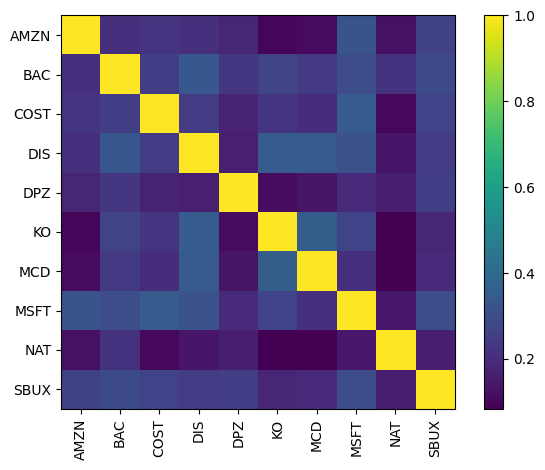

In [ ]:
plotting.plot_covariance(S, plot_correlation=True);

In [ ]:
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior

,0
Ticker,
AMZN,0.200912
BAC,0.100302
COST,0.076508
DIS,0.090477
DPZ,0.037756
KO,0.051512
MCD,0.056034
MSFT,0.156510
NAT,0.040300


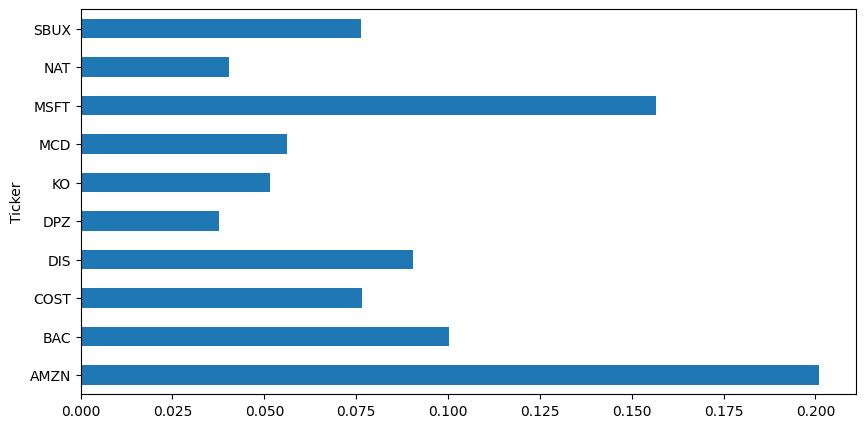

In [ ]:
market_prior.plot.barh(figsize=(10,5));

In [ ]:
# You don't have to provide views on all the assets
viewdict = {
    "AMZN": 0.10,
    "BAC": 0.30,
    "COST": 0.05,
    "DIS": 0.05,
    "DPZ": 0.20,
    "KO": -0.05,  # I think Coca-Cola will go down 5%
    "MCD": 0.15,
    "MSFT": 0.10,
    "NAT": 0.50,  # but low confidence, which will be reflected later
    "SBUX": 0.10
}

bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict)

In [ ]:
confidences = [
    0.6,
    0.4,
    0.2,
    0.5,
    0.7, # confident in dominos
    0.7, # confident KO will do poorly
    0.7,
    0.5,
    0.1,
    0.4
]

In [ ]:
bl = BlackLittermanModel(S, pi=market_prior, absolute_views=viewdict, omega="idzorek", view_confidences=confidences)

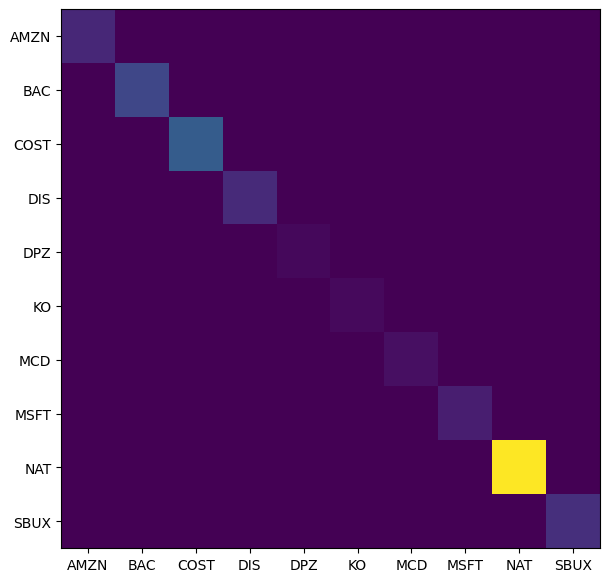

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(bl.omega)

# We want to show all ticks...
ax.set_xticks(np.arange(len(bl.tickers)))
ax.set_yticks(np.arange(len(bl.tickers)))

ax.set_xticklabels(bl.tickers)
ax.set_yticklabels(bl.tickers)
plt.show()

In [ ]:
np.diag(bl.omega)

array([0.00456979, 0.00876775, 0.01202739, 0.00495541, 0.00088255,
       0.00112499, 0.00167737, 0.00345318, 0.04146517, 0.00552926])

In [ ]:
intervals = [
    (0, 0.25),
    (0.1, 0.4),
    (-0.1, 0.15),
    (-0.05, 0.1),
    (0.15, 0.25),
    (-0.1, 0),
    (0.1, 0.2),
    (0.08, 0.12),
    (0.1, 0.9),
    (0, 0.3)
]

In [ ]:
variances = []
for lb, ub in intervals:
    sigma = (ub - lb)/2
    variances.append(sigma ** 2)

print(variances)
omega = np.diag(variances)

[0.015625, 0.022500000000000006, 0.015625, 0.0056250000000000015, 0.0025000000000000005, 0.0025000000000000005, 0.0025000000000000005, 0.00039999999999999986, 0.16000000000000003, 0.0225]


In [ ]:
# We are using the shortcut to automatically compute market-implied prior
bl = BlackLittermanModel(S, pi="market", market_caps=mcaps, risk_aversion=delta,
                        absolute_views=viewdict, omega=omega)

In [ ]:
# Posterior estimate of returns
ret_bl = bl.bl_returns()
ret_bl

,0
Ticker,
AMZN,0.173253
BAC,0.134113
COST,0.067833
DIS,0.073877
DPZ,0.107211
KO,0.008128
MCD,0.103028
MSFT,0.107237
NAT,0.063069


In [ ]:
rets_df = pd.DataFrame([market_prior, ret_bl, pd.Series(viewdict)],
             index=["Prior", "Posterior", "Views"]).T
rets_df

,Prior,Posterior,Views
AMZN,0.200912,0.173253,0.10
BAC,0.100302,0.134113,0.30
COST,0.076508,0.067833,0.05
DIS,0.090477,0.073877,0.05
DPZ,0.037756,0.107211,0.20
KO,0.051512,0.008128,-0.05
MCD,0.056034,0.103028,0.15
MSFT,0.156510,0.107237,0.10
NAT,0.040300,0.063069,0.50
SBUX,0.076438,0.086042,0.10


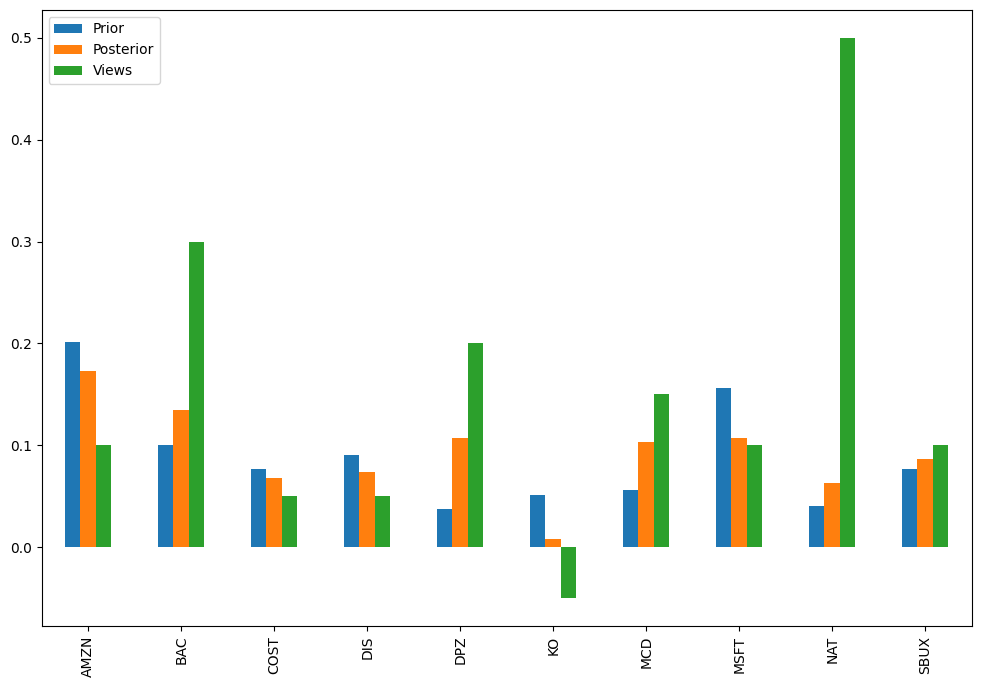

In [ ]:
rets_df.plot.bar(figsize=(12,8));

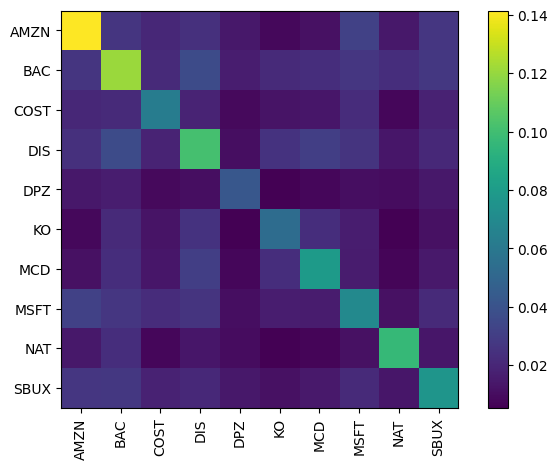

In [ ]:
S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);

In [ ]:
from pypfopt import EfficientFrontier, objective_functions

In [ ]:
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

/usr/local/lib/python3.11/dist-packages/pypfopt/efficient_frontier/efficient_frontier.py:259: UserWarning:

max_sharpe transforms the optimization problem so additional objectives may not work as expected.



OrderedDict([('AMZN', 0.1909),
             ('BAC', 0.14347),
             ('COST', 0.07165),
             ('DIS', 0.07111),
             ('DPZ', 0.12963),
             ('KO', 0.0),
             ('MCD', 0.11725),
             ('MSFT', 0.11815),
             ('NAT', 0.0669),
             ('SBUX', 0.09094)])

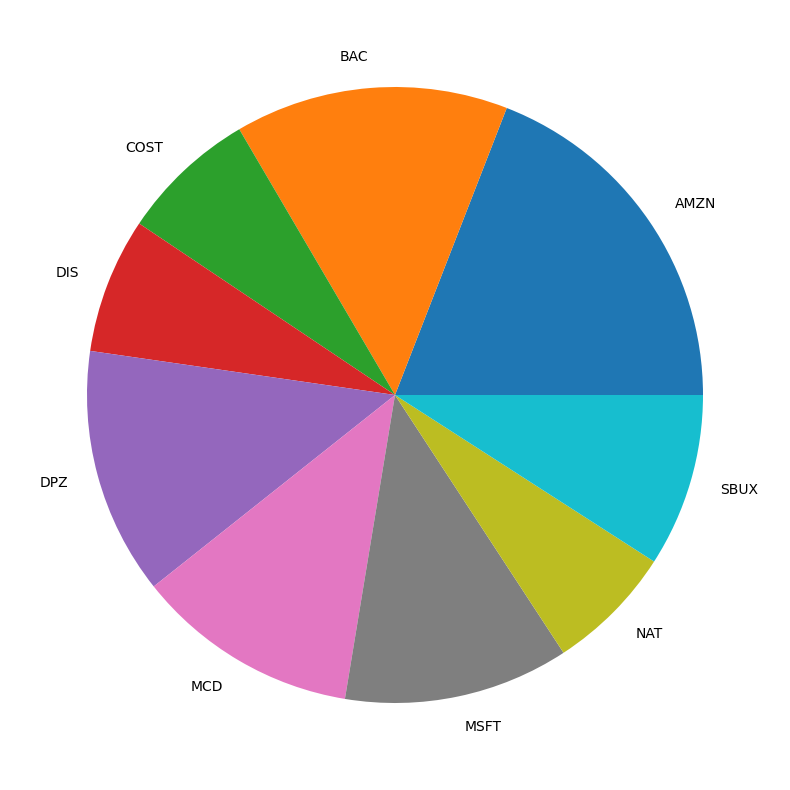

In [ ]:
pd.Series(weights).plot.pie(figsize=(10,10));

In [ ]:
from pypfopt import DiscreteAllocation

da = DiscreteAllocation(weights, prices.iloc[-1], total_portfolio_value=20000)
alloc, leftover = da.lp_portfolio()
print(f"Leftover: ${leftover:.2f}")
alloc

Leftover: $17.45


{'AMZN': 18,
 'BAC': 66,
 'COST': 1,
 'DIS': 13,
 'DPZ': 6,
 'MCD': 8,
 'MSFT': 5,
 'NAT': 480,
 'SBUX': 20}

## Hierarchical-Risk-Parity

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import pypfopt

In [ ]:
tickers = ["BLK", "BAC", "AAPL", "TM", "WMT",
           "JD", "INTU", "MA", "UL", "CVS",
           "DIS", "AMD", "NVDA", "PBI", "TGT"]

ohlc = yf.download(tickers,auto_adjust=False, period="max")
prices = ohlc["Adj Close"]
prices.tail()

[*********************100%***********************]  15 of 15 completed


Ticker,AAPL,AMD,BAC,BLK,CVS,DIS,INTU,JD,MA,NVDA,PBI,TGT,TM,UL,WMT
Date,,,,,,,,,,,,,,,
2025-06-09,201.449997,121.730003,44.869999,988.840027,63.860001,115.660004,764.380005,33.939999,584.330017,142.620102,10.53,97.349998,183.940002,62.750000,97.449997
2025-06-10,202.669998,123.239998,45.090000,991.900024,64.260002,118.730003,762.099976,33.790001,589.539978,143.950012,10.49,100.769997,185.250000,63.130001,97.320000
2025-06-11,198.779999,121.139999,44.730000,993.299988,65.720001,119.519997,764.750000,33.730000,590.739990,142.830002,10.45,98.110001,182.610001,62.939999,95.800003
2025-06-12,199.199997,118.500000,44.619999,988.250000,66.349998,118.610001,766.210022,33.610001,589.280029,145.000000,10.49,99.290001,181.990005,63.650002,94.830002
2025-06-13,196.449997,116.160004,44.090000,971.820007,67.459999,117.940002,753.979980,32.759998,562.030029,141.970001,10.28,95.370003,178.750000,62.669998,94.440002


In [ ]:
from pypfopt import expected_returns

rets = expected_returns.returns_from_prices(prices)
rets.tail()

Ticker,AAPL,AMD,BAC,BLK,CVS,DIS,INTU,JD,MA,NVDA,PBI,TGT,TM,UL,WMT
Date,,,,,,,,,,,,,,,
2025-06-09,-0.012113,0.047681,-0.002224,-0.000212,0.004404,0.015452,-0.009332,0.024758,-0.009812,0.006421,0.000000,0.000308,-0.006482,-0.004284,-0.000205
2025-06-10,0.006056,0.012404,0.004903,0.003095,0.006264,0.026543,-0.002983,-0.004419,0.008916,0.009325,-0.003799,0.035131,0.007122,0.006056,-0.001334
2025-06-11,-0.019194,-0.017040,-0.007984,0.001411,0.022720,0.006654,0.003477,-0.001776,0.002036,-0.007781,-0.003813,-0.026397,-0.014251,-0.003010,-0.015619
2025-06-12,0.002113,-0.021793,-0.002459,-0.005084,0.009586,-0.007614,0.001909,-0.003558,-0.002471,0.015193,0.003828,0.012027,-0.003395,0.011281,-0.010125
2025-06-13,-0.013805,-0.019747,-0.011878,-0.016625,0.016729,-0.005649,-0.015962,-0.025290,-0.046243,-0.020897,-0.020019,-0.039480,-0.017803,-0.015397,-0.004113


In [ ]:
from pypfopt import HRPOpt

In [ ]:
hrp = HRPOpt(rets)
hrp.optimize()
weights = hrp.clean_weights()
weights

OrderedDict([('AAPL', 0.03962),
             ('AMD', 0.02924),
             ('BAC', 0.04168),
             ('BLK', 0.04487),
             ('CVS', 0.1139),
             ('DIS', 0.05957),
             ('INTU', 0.03687),
             ('JD', 0.04597),
             ('MA', 0.04769),
             ('NVDA', 0.02282),
             ('PBI', 0.07697),
             ('TGT', 0.07669),
             ('TM', 0.09776),
             ('UL', 0.17206),
             ('WMT', 0.0943)])

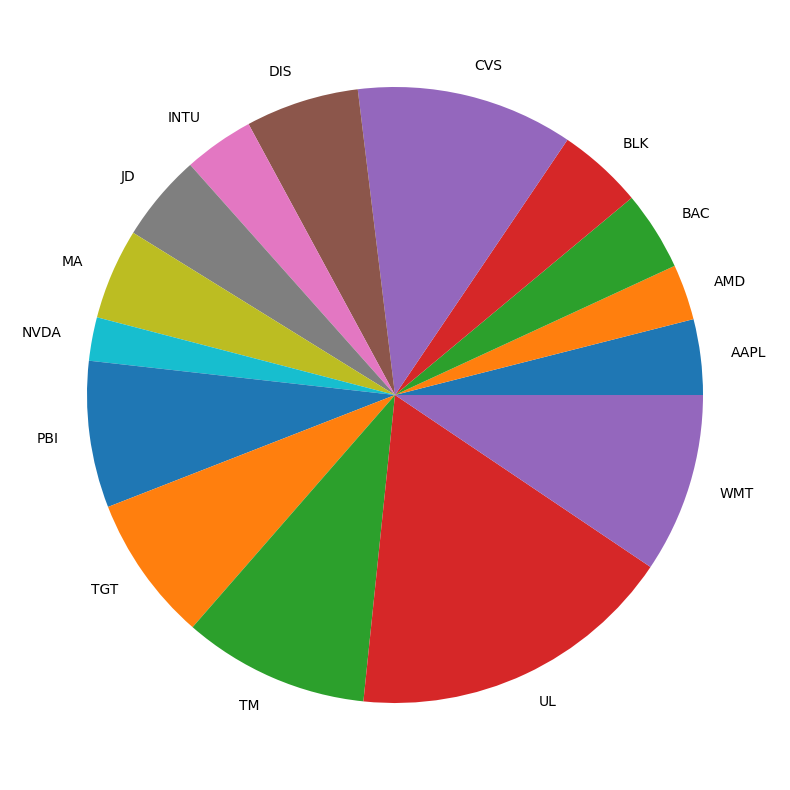

In [ ]:
pd.Series(weights).plot.pie(figsize=(10, 10));

In [ ]:
hrp.portfolio_performance(verbose=True);

Expected annual return: 18.9%
Annual volatility: 19.0%
Sharpe Ratio: 0.99


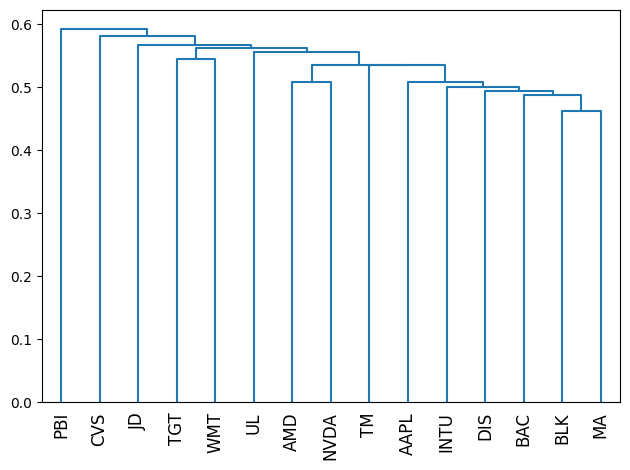

In [ ]:
from pypfopt import plotting

plotting.plot_dendrogram(hrp);